In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def load_train_test_data(base_path):
    def load_data(folder_path):
        df_list = []
        for entry in os.listdir(folder_path):
            # Example: class1_train.txt → class1
            class_label = entry.split('_')[0]
            file_path = os.path.join(folder_path, entry)
            temp_df = pd.read_csv(file_path, sep=' ', names=['Feature1', 'Feature2'])
            temp_df['Class'] = class_label
            df_list.append(temp_df)
        return pd.concat(df_list, ignore_index=True)

    train_path = os.path.join(base_path, "train")
    test_path = os.path.join(base_path, "test")

    train_df = load_data(train_path)
    test_df = load_data(test_path)

    return train_df, test_df


base_path = "../../Dataset/Group04/LS_Group04/"
# base_path = "../../Dataset/Group04/NLS_Group04/"
# base_path = "../../Dataset/Group04/rd_group4/"

train_df, test_df = load_train_test_data(base_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())
print(test_df.head())

Train shape: (1050, 3)
Test shape: (450, 3)
   Feature1  Feature2   Class
0    15.740  -1.59750  Class1
1    16.975  -0.60430  Class1
2    16.200  -0.97683  Class1
3    15.335  -0.94855  Class1
4    11.654   1.66810  Class1
   Feature1  Feature2   Class
0    17.373 -1.141300  Class1
1    16.963 -0.175130  Class1
2    17.247 -0.462570  Class1
3    14.788 -0.078501  Class1
4    15.500 -0.658930  Class1


In [3]:
train_df

,Feature1,Feature2,Class
0,15.74000,-1.59750,Class1
1,16.97500,-0.60430,Class1
2,16.20000,-0.97683,Class1
3,15.33500,-0.94855,Class1
4,11.65400,1.66810,Class1
...,...,...,...
1045,-0.11932,0.43910,Class3
1046,1.00280,4.72580,Class3
1047,0.13614,3.90870,Class3
1048,-0.86552,3.19130,Class3


In [4]:
# folder_path = '../../Dataset/Group04/LS_Group04/'

# all_entries = os.listdir(folder_path)

In [5]:
# print(all_entries)


In [6]:
# for entry in all_entries:
#     class_label = entry.split('.')[0]
#     file_path = folder_path+entry
#     print(file_path)
#     temp_df = pd.read_csv(file_path, sep=' ', names=['Feature1',"Feature2"])
#     temp_df['Class'] = class_label
#     df_list.append(temp_df)
#     print(temp_df)

In [7]:
# merged_df = pd.concat(df_list, ignore_index=True)

In [8]:
print(train_df.head())

   Feature1  Feature2   Class
0    15.740  -1.59750  Class1
1    16.975  -0.60430  Class1
2    16.200  -0.97683  Class1
3    15.335  -0.94855  Class1
4    11.654   1.66810  Class1


In [9]:
train_df.shape

(1050, 3)

In [10]:
# plt.figure(figsize=(10,10))

# for class_name in merged_df['Class'].unique():
#     print(class_name)

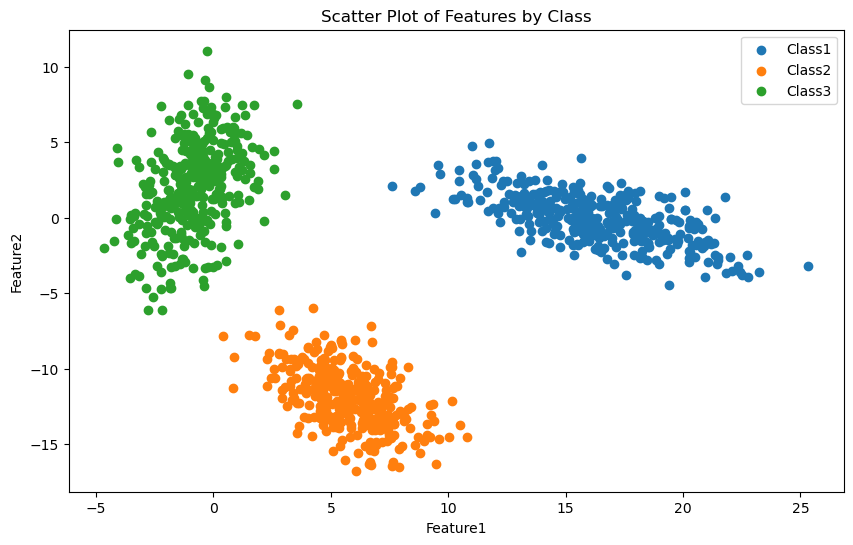

In [11]:
# df = merged_df[["Feature1","Feature2","Class"]]
plt.figure(figsize=(10, 6))
for cls in train_df['Class'].unique():
    subset = train_df[train_df['Class'] == cls]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=cls)

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Features by Class')
plt.legend()
plt.show()

In [12]:
print(train_df.isna().sum())

Feature1    0
Feature2    0
Class       0
dtype: int64


In [13]:
def mean(x: list[float]) -> float:
    ''' Docstring 
    
    '''
    return sum(x)/len(x)

def covariance(x: list[float],y: list[float]) -> float:
    ''' Docstring dfghjk
    
    '''
    if len(x) != len(y):
        raise ValueError("Length mismatch between input lists")
    numerator = 0
    x_mean = mean(x)
    y_mean = mean(y)
    for i, j in zip(x,y):
        numerator += (i-x_mean)*(j-y_mean)
        
    return numerator/(len(x)-1)

def covariance_matrix(class_data, mean_vector=0):
    n_samples = len(class_data)
    n_features = 2
    cov_matrix = [[0.0] * n_features for _ in range(n_features)]
    
    for i in range(n_features):
        for j in range(n_features):
            cov_matrix[i][j] = covariance(class_data.iloc[:, i], class_data.iloc[:, j])
    return cov_matrix

In [14]:
# covariance([1,2,3],[1,4,6])

In [15]:
# df['Class'].unique()

In [16]:
# covariance_matrix(merged_df)

In [17]:
def average_variance(class_dataset):
    total_variance = 0
    total_count = 0
    for class_data in class_dataset:
        cov_mat = covariance_matrix(class_data)
        for i in range(len(cov_mat)):
            total_variance += cov_mat[i][i]
            total_count += 1
    return total_variance/total_count

def shared_covariance_matrix_sigma_squared_I(class_datasets: list):
    sigma_squared = average_variance(class_datasets)
    n_features = len(class_datasets[0].columns)
    return [[sigma_squared if i == j else 0 for j in range(n_features)] for i in range(n_features)]

In [18]:
def compute_class_means_and_priors(train_df):
    class_means = {}
    priors = {}

    total_samples = len(train_df)

    for cls in train_df['Class'].unique():
        class_data = train_df[train_df['Class'] == cls][['Feature1', 'Feature2']]
        feature1_values = class_data['Feature1'].tolist()
        feature2_values = class_data['Feature2'].tolist()
        
        mean_feature1 = sum(feature1_values) / len(feature1_values)
        mean_feature2 = sum(feature2_values) / len(feature2_values)

        class_means[cls] = [mean_feature1, mean_feature2]
        priors[cls] = len(class_data) / total_samples

    return class_means, priors

def discriminant_sigma2I(x, mean_vec, sigma2, prior):
    x = np.array(x)
    mean_vec = np.array(mean_vec)

    diff = x - mean_vec
    term1 = -0.5 * np.dot(diff.T, diff) / sigma2
    term2 = np.log(prior)

    return term1 + term2
    

def predict_sigma2I(test_df, class_means, priors, sigma2):
    predictions = []

    for _, row in test_df.iterrows():
        x = [row['Feature1'], row['Feature2']]
        scores = {}

        for cls in class_means:
            score = discriminant_sigma2I(x, class_means[cls], sigma2, priors[cls])
            scores[cls] = score

        predicted_class = max(scores, key=scores.get)
        predictions.append(predicted_class)

    return predictions



In [19]:
import numpy as np
class_data_train = [train_df[train_df['Class'] == c][['Feature1', 'Feature2']] for c in train_df['Class'].unique()]

# Step 3: Get sigma²
sigma2_cov = shared_covariance_matrix_sigma_squared_I(class_data_train)
sigma2 = sigma2_cov[0][0]  # since diagonal and same for all

# Step 4: Compute means and priors
class_means, priors = compute_class_means_and_priors(train_df)

# Step 5: Predict
test_df['Predicted'] = predict_sigma2I(test_df, class_means, priors, sigma2)

In [20]:
def confusion_matrix(true_labels, predicted_labels, classes):
    # Initialize matrix as dict of dicts for clarity
    matrix = {true_cls: {pred_cls: 0 for pred_cls in classes} for true_cls in classes}

    for t, p in zip(true_labels, predicted_labels):
        matrix[t][p] += 1

    return matrix

def accuracy(true_labels, predicted_labels):
    correct = sum(t == p for t, p in zip(true_labels, predicted_labels))
    total = len(true_labels)
    return correct / total if total > 0 else 0

def precision_recall_f1(conf_matrix, classes):
    precision = {}
    recall = {}
    f1 = {}

    for cls in classes:
        TP = conf_matrix[cls][cls]
        FP = sum(conf_matrix[other][cls] for other in classes if other != cls)
        FN = sum(conf_matrix[cls][other] for other in classes if other != cls)

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

        precision[cls] = prec
        recall[cls] = rec
        f1[cls] = f1_score

    mean_precision = sum(precision.values()) / len(classes)
    mean_recall = sum(recall.values()) / len(classes)
    mean_f1 = sum(f1.values()) / len(classes)

    return precision, recall, f1, mean_precision, mean_recall, mean_f1


In [21]:
true_labels = test_df['Class'].tolist()
predicted_labels = test_df['Predicted'].tolist()
classes = list(test_df['Class'].unique())

cm = confusion_matrix(true_labels, predicted_labels, classes)
acc = accuracy(true_labels, predicted_labels)
prec, rec, f1, mean_prec, mean_rec, mean_f1 = precision_recall_f1(cm, classes)

print("\n\nConfusion Matrix:\n", cm)
print("\n\nAccuracy:\n", acc)
print("\n\nPrecision per class:\n", prec)
print("\n\nRecall per class:\n", rec)
print("\n\nF1 Score per class:\n", f1)
print("\n\nMean Precision:\n", mean_prec)
print("\n\nMean Recall:\n", mean_rec)
print("\n\nMean F1 Score:\n", mean_f1)




Confusion Matrix:
 {'Class1': {'Class1': 148, 'Class2': 0, 'Class3': 2}, 'Class2': {'Class1': 0, 'Class2': 150, 'Class3': 0}, 'Class3': {'Class1': 0, 'Class2': 0, 'Class3': 150}}


Accuracy:
 0.9955555555555555


Precision per class:
 {'Class1': 1.0, 'Class2': 1.0, 'Class3': 0.9868421052631579}


Recall per class:
 {'Class1': 0.9866666666666667, 'Class2': 1.0, 'Class3': 1.0}


F1 Score per class:
 {'Class1': 0.9932885906040269, 'Class2': 1.0, 'Class3': 0.9933774834437086}


Mean Precision:
 0.9956140350877193


Mean Recall:
 0.9955555555555556


Mean F1 Score:
 0.9955553580159119


In [22]:
def pretty_print_results(cm, acc, prec, rec, f1, mean_prec, mean_rec, mean_f1):
    print("\n=== Confusion Matrix ===")
    cm_df = pd.DataFrame(cm).T  # Convert dict-of-dict to DataFrame
    print(cm_df)

    print("\n=== Classification Report ===")
    report_df = pd.DataFrame({
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    print(report_df)

    print("\n=== Summary ===")
    print(f"Accuracy     : {acc}")
    print(f"Mean Precision: {mean_prec}")
    print(f"Mean Recall   : {mean_rec}")
    print(f"Mean F1 Score : {mean_f1}")

pretty_print_results(cm, acc, prec, rec, f1, mean_prec, mean_rec, mean_f1)



=== Confusion Matrix ===
        Class1  Class2  Class3
Class1     148       0       2
Class2       0     150       0
Class3       0       0     150

=== Classification Report ===
        Precision    Recall  F1-Score
Class1   1.000000  0.986667  0.993289
Class2   1.000000  1.000000  1.000000
Class3   0.986842  1.000000  0.993377

=== Summary ===
Accuracy     : 0.9955555555555555
Mean Precision: 0.9956140350877193
Mean Recall   : 0.9955555555555556
Mean F1 Score : 0.9955553580159119


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_density_contours(train_df, class_means, class_covs, title="Constant Density Contours"):
    """
    Plots Gaussian density contours for each class with training data.
    class_means: dict {class_name: [mean1, mean2]}
    class_covs: dict {class_name: covariance_matrix (2x2)}
    """

    plt.figure(figsize=(8, 6))

    colors = ["red", "blue", "green", "purple", "orange"]

    for idx, cls in enumerate(train_df['Class'].unique()):
        subset = train_df[train_df['Class'] == cls]
        plt.scatter(subset['Feature1'], subset['Feature2'], 
                    label=cls, alpha=0.6, color=colors[idx % len(colors)])

        mean = np.array(class_means[cls])
        cov = np.array(class_covs[cls])

        # Eigen decomposition for ellipse axes
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]

        # Ellipse parameters
        angle = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
        
        # Plot 1σ, 2σ, 3σ contours
        for scale in [1, 2, 3]:
            width, height = 2 * scale * np.sqrt(eigvals)
            ellipse = Ellipse(mean, width, height, angle,
                              edgecolor=colors[idx % len(colors)], 
                              facecolor='none', linewidth=2, alpha=0.7)
            plt.gca().add_patch(ellipse)

    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\Pratik Manusmare\AppData\Local\Temp\ipykernel_22552\3287962850.py:35: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, width, height, angle,


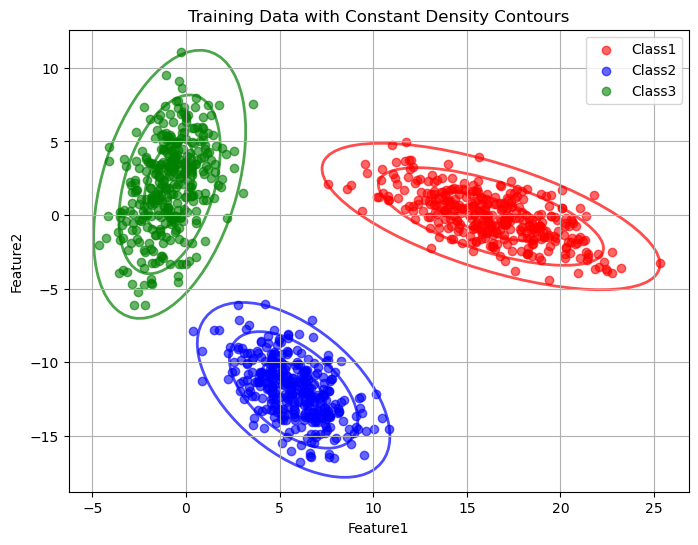

In [24]:
# Build dict of class covariances
class_covs = {}
for cls in train_df['Class'].unique():
    class_data = train_df[train_df['Class'] == cls][['Feature1', 'Feature2']]
    class_covs[cls] = np.array(covariance_matrix(class_data))

# Plot
plot_density_contours(train_df, class_means, class_covs, title="Training Data with Constant Density Contours")


In [25]:
from itertools import combinations

def classify_point_sigma2I(x, class_means, covs, priors):
    sigma2 = covs[list(covs.keys())[0]][0][0]  # shared σ²
    scores = {}
    for cls, mean_vec in class_means.items():
        diff = np.array(x) - np.array(mean_vec)
        term1 = -0.5 * np.dot(diff.T, diff) / sigma2
        term2 = np.log(priors[cls])
        scores[cls] = term1 + term2
    return max(scores, key=scores.get)


def plot_decision_regions(train_df, class_means, class_covs, priors, classifier_fn, title="Decision Regions"):
    x_min, x_max = train_df['Feature1'].min() - 1, train_df['Feature1'].max() + 1
    y_min, y_max = train_df['Feature2'].min() - 1, train_df['Feature2'].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = []
    for i in range(xx.shape[0]):
        row_preds = []
        for j in range(xx.shape[1]):
            point = [xx[i, j], yy[i, j]]
            pred = classifier_fn(point, class_means, class_covs, priors)
            row_preds.append(pred)
        Z.append(row_preds)
    Z = np.array(Z)

    plt.figure(figsize=(8, 6))

    # plot regions
    unique_classes = train_df['Class'].unique()
#     colors = ["#FF0000", "#0000FF", "#f652a0", "#f652a0", "#f652a0"]
    colors = ["#8dd3c7", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9"]
#     colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628"]


    
    cmap = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}

    for cls in unique_classes:
        mask = (Z == cls)
        plt.contour(xx, yy, Z, colors='k', linewidths=2)

    # overlay training points
    markers = ['o', 's', '^', 'x', 'D']
    for i, cls in enumerate(unique_classes):
        subset = train_df[train_df['Class'] == cls]
        plt.scatter(subset['Feature1'], subset['Feature2'],
                    label=cls, edgecolor='k', alpha=0.8, marker=markers[i % len(markers)])

    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title(title)
    plt.legend()
    plt.show()




In [26]:

def plot_decision_regions(train_df, class_means, class_covs, priors, classifier_fn, title="Decision Regions"):
    x_min, x_max = train_df['Feature1'].min() - 1, train_df['Feature1'].max() + 1
    y_min, y_max = train_df['Feature2'].min() - 1, train_df['Feature2'].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = []
    for i in range(xx.shape[0]):
        row_preds = []
        for j in range(xx.shape[1]):
            point = [xx[i, j], yy[i, j]]
            pred = classifier_fn(point, class_means, class_covs, priors)
            row_preds.append(pred)
        Z.append(row_preds)
    Z = np.array(Z)

    plt.figure(figsize=(8, 6))

    unique_classes = train_df['Class'].unique()
    colors = ["#8dd3c7", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9"]
    colors = ["#ffffff", "#000000"]
    cmap = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}

    # Map class labels to integers for contour plotting
    class_to_int = {cls: i for i, cls in enumerate(unique_classes)}
    Z_int = np.vectorize(class_to_int.get)(Z)

    # Plot filled contours with colors for each class
    for cls in unique_classes:
        mask = (Z == cls)
        plt.contourf(xx, yy, mask, alpha=0.3, colors=[cmap[cls]])

    # Plot black contour lines between classes using numeric Z_int
    plt.contour(xx, yy, Z_int, colors='k', linewidths=1)

    # Overlay training points
    markers = ['o', 's', '^', 'x', 'D']
    for i, cls in enumerate(unique_classes):
        subset = train_df[train_df['Class'] == cls]
        plt.scatter(subset['Feature1'], subset['Feature2'],
                    label=cls, edgecolor='k', alpha=0.8, marker=markers[i % len(markers)])

    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title(title)
    plt.legend()
    plt.show()


plot_pairwise_decision_regions(train_df, class_means, class_covs, priors, classify_point_sigma2I)

NameError: name 'plot_pairwise_decision_regions' is not defined